### 半径的统计分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

data_root = '/home/haoyanzhen_shao/project/nn_cf/RefineDet/dataset/cf_l_v1/'
testlist = os.listdir(data_root+'catalog/')
np.random.seed(20230427)
testlist = np.random.choice(testlist,10000)
with open(data_root+'anno/radius_satatistic.txt','w') as sf:
    sf.write(repr(testlist))

radius = []
for _file in testlist:
    _cat = np.load(data_root+'catalog/'+_file)
    _radius = (_cat[:,2]-_cat[:,0])/2
    radius += _radius.tolist()
radius = np.array(radius)
len(radius)

11304048

(1.1736645698547363, 17.68440055847168)

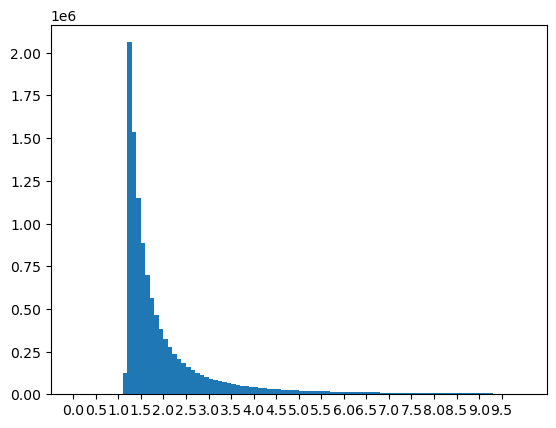

In [2]:
plt.hist(radius,bins=100,range=(0,10))
plt.xticks(np.arange(0,10,0.5))
min(radius),max(radius)

/tmp/ipykernel_1228837/1958255613.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.step(edge[:-1],np.log10(1-cumulative_hist))


Text(0, 0.5, 'log10(1-cumulative_distribution)')

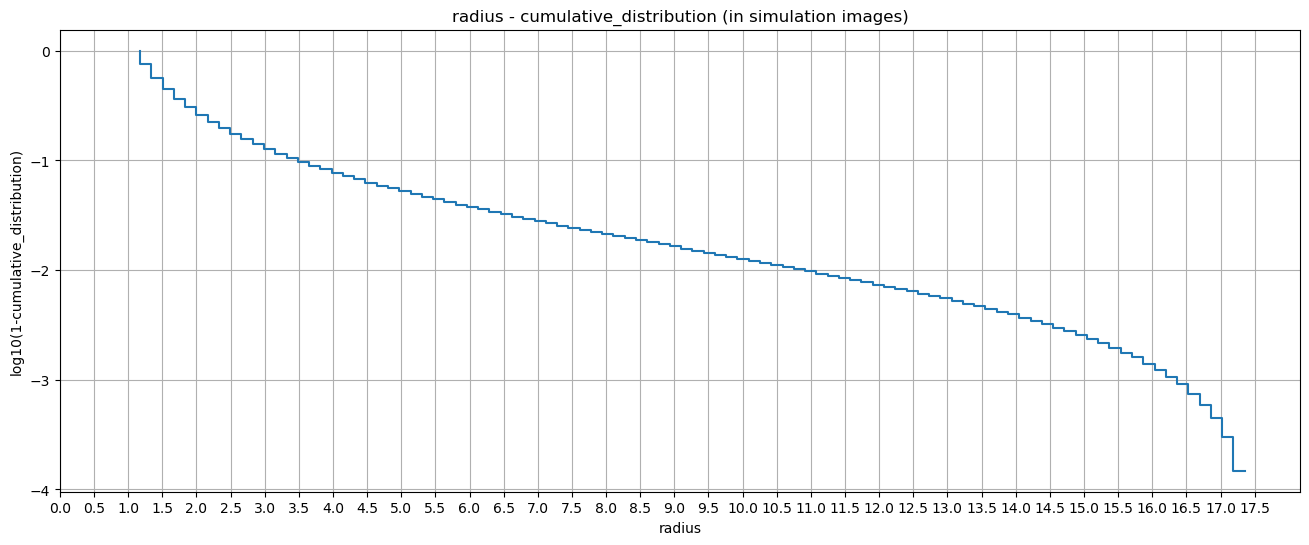

In [3]:
hist,edge = np.histogram(radius,bins=100)
cumulative_hist = np.zeros_like(hist)
for i in range(len(cumulative_hist)):
    cumulative_hist[i] = hist[:i].sum()
cumulative_hist = cumulative_hist/cumulative_hist[-1]
plt.figure(figsize=(16,6))
plt.step(edge[:-1],np.log10(1-cumulative_hist))
plt.xticks(np.arange(0,18,0.5))
plt.yticks(np.arange(-4,1,1))
plt.grid()
plt.title('radius - cumulative_distribution (in simulation images)')
plt.xlabel('radius')
plt.ylabel('log10(1-cumulative_distribution)')

In [4]:
import pandas as pd

cat_path = '/home/haoyanzhen_shao/project/simulation_work/work_dir/CrowdedField20230222/MSC_0000000/MSC_100000000_chip_08_filt_g.cat'
with open(cat_path,'r') as f:
    names = f.readlines()[0].strip()[1:].split(' ')[1:]
cat = pd.read_csv(cat_path,delim_whitespace=True,names=names,comment='#')
cat['mag'].describe()

count    5.896700e+06
mean     2.385586e+01
std      2.328290e+00
min      1.452770e+01
25%      2.277640e+01
50%      2.456420e+01
75%      2.562320e+01
max      2.652990e+01
Name: mag, dtype: float64

为什么这里星等截断到了14.5，依然是个未解之谜。。

### 密度的统计分布

#### 单尺寸区间的单模糊单元的密度分布

In [ ]:
# Create a 2D array to represent the grid of 2*2 regions
grid = [[0 for _ in range(100)] for _ in range(100)]

# Iterate through the given coordinates and increment the count of the corresponding 2*2 region
for x, y in coordinates:
    grid[x//2][y//2] += 1

# Find the maximum count in the 2D array
plt.imshow(grid,origin='lower')


#### 单尺寸区间随模糊单元边数的密度函数

In [3]:
import numpy as np

ambiguous_list = [2,4,8,16]
side_pixel = 128

def conv(base,kernel):
    base_len = len(base)
    kernel_len = len(kernel)
    if base_len < kernel_len:
        print('error: base < kernel')
    output_len = base_len-kernel_len+1
    output = np.zeros((output_len,output_len))
    for i in range(output_len):
        for j in range(output_len):
            inter = base[i:i+kernel_len,j:j+kernel_len].reshape(-1) * kernel.reshape(-1)
            output[i,j] = inter.sum()
    return output

def density_grid(coor,side_pixel,area_side):
    '''
    coor: (n_objects,2)
    side_pixel: 图像的pixel变长
    area_side: 统计密度的面积边长
    '''
    grid = np.zeros((side_pixel,side_pixel))
    for i in range(len(coor)):
        grid[int(coor[i,0]//1),int(coor[i,1]//1)] += 1
    conv_kernel = np.ones((area_side,area_side))
    density = conv(grid,conv_kernel)
    return density
    
catt = np.load('./RefineDet/dataset/cf_l_v1/catalog/cat_0_0.npy')
coor = (catt[:,2:4]+catt[:,:2])/2
density_grid(coor,128,64)
all_ambiguous_density = list()
# 对每一个尺寸的模糊框
for _am in ambiguous_list:
    am_times = np.arange(1,side_pixel//_am+1)
    area_side_list = _am * am_times
    print(area_side_list)
    single_ambiguous_density = list()
    # 每一个面积下的密度最大值
    for _as in area_side_list:
        count = density_grid(coor,side_pixel,_as).max()
        density = count/_as**2
        single_ambiguous_density.append(density)
    all_ambiguous_density.append(single_ambiguous_density)
all_ambiguous_density

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106 108
 110 112 114 116 118 120 122 124 126 128]
[  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72
  76  80  84  88  92  96 100 104 108 112 116 120 124 128]
[  8  16  24  32  40  48  56  64  72  80  88  96 104 112 120 128]
[ 16  32  48  64  80  96 112 128]


[[1.0,
  0.375,
  0.2777777777777778,
  0.203125,
  0.17,
  0.1597222222222222,
  0.1377551020408163,
  0.125,
  0.11419753086419752,
  0.1125,
  0.10950413223140495,
  0.1076388888888889,
  0.10502958579881656,
  0.10586734693877552,
  0.10777777777777778,
  0.103515625,
  0.09948096885813149,
  0.09645061728395062,
  0.09279778393351801,
  0.089375,
  0.08786848072562359,
  0.08677685950413223,
  0.08412098298676748,
  0.08333333333333333,
  0.0836,
  0.08321005917159763,
  0.08299039780521263,
  0.08163265306122448,
  0.08085612366230678,
  0.08055555555555556,
  0.07960457856399583,
  0.078857421875,
  0.07897153351698806,
  0.07785467128027682,
  0.07755102040816327,
  0.07735339506172839,
  0.07761139517896275,
  0.07721606648199446,
  0.07741617357001973,
  0.076875,
  0.07584770969660916,
  0.07497165532879818,
  0.07409410492157924,
  0.07399276859504132,
  0.07320987654320987,
  0.07348771266540642,
  0.07322317790855591,
  0.072265625,
  0.07257392753019576,
  0.0719,
  0.07

In [5]:
len(coor)

969

'ss'

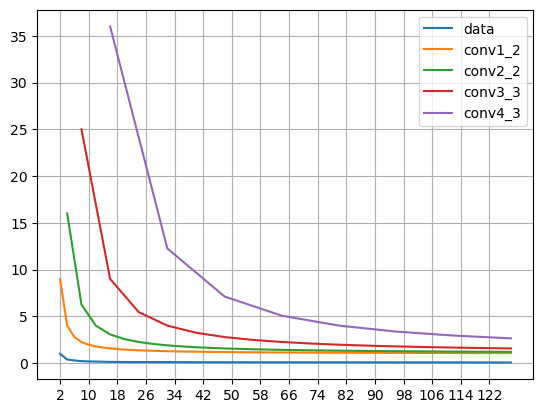

In [59]:
import matplotlib.pyplot as plt

as_list = ambiguous_list[0] * np.arange(1,side_pixel//ambiguous_list[0]+1)
plt.plot(as_list,all_ambiguous_density[0],label='data')
plt.xticks(as_list[::4])
# plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.plot(as_list,((6/2-1+as_list/2)/(as_list/2))**2,label='conv1_2')
x = as_list[1::2]
plt.plot(x,((16/4-1+x/4)/(x/4))**2,label='conv2_2')
x = as_list[3::4]
plt.plot(x,((40/8-1+x/8)/(x/8))**2,label='conv3_3')
x = as_list[7::8]
plt.plot(x,((96/16-1+x/16)/(x/16))**2,label='conv4_3')
plt.legend()
'ss'

In [56]:
as_list[3::4]

array([  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96, 104,
       112, 120, 128])

test

tensor([[0.5000, 0.5000],
        [0.5000, 1.5000],
        [0.5000, 2.5000],
        [1.5000, 0.5000],
        [1.5000, 1.5000],
        [1.5000, 2.5000],
        [2.5000, 0.5000],
        [2.5000, 1.5000],
        [2.5000, 2.5000]])

In [17]:
grid_x.reshape(-1)

tensor([0.5000, 0.5000, 0.5000, 1.5000, 1.5000, 1.5000, 2.5000, 2.5000, 2.5000])

In [26]:
x1 = torch.randn(100,2)
x2 = torch.ones_like(x1)*62
xt = torch.concat((x1,x2),dim=1)
xt

tensor([[-8.1707e-01, -1.4374e+00,  6.2000e+01,  6.2000e+01],
        [ 1.0550e+00, -1.5159e+00,  6.2000e+01,  6.2000e+01],
        [-2.0750e+00, -3.7803e-01,  6.2000e+01,  6.2000e+01],
        [-1.6318e-01,  9.3208e-01,  6.2000e+01,  6.2000e+01],
        [-2.5019e-01,  2.5853e-01,  6.2000e+01,  6.2000e+01],
        [-2.9366e-01, -2.5479e-01,  6.2000e+01,  6.2000e+01],
        [ 1.1613e+00, -1.0413e+00,  6.2000e+01,  6.2000e+01],
        [ 8.3994e-01,  4.1693e-01,  6.2000e+01,  6.2000e+01],
        [ 3.3290e-02,  7.5942e-01,  6.2000e+01,  6.2000e+01],
        [-5.4679e-02, -8.6238e-02,  6.2000e+01,  6.2000e+01],
        [-1.6511e-01,  6.4324e-01,  6.2000e+01,  6.2000e+01],
        [ 3.1617e-01,  6.3915e-01,  6.2000e+01,  6.2000e+01],
        [ 2.5157e-01, -2.2992e-01,  6.2000e+01,  6.2000e+01],
        [ 5.8399e-01, -7.5956e-01,  6.2000e+01,  6.2000e+01],
        [ 1.4644e+00,  8.4114e-01,  6.2000e+01,  6.2000e+01],
        [ 1.1620e+00,  1.6614e-01,  6.2000e+01,  6.2000e+01],
        